# MAKİNE ÖĞRENMESİ ÖDEVİ


## VERİ İŞLEME AŞAMALARI

### KÜTÜPHANELERİN İÇE AKTARIMI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report,log_loss, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
from sklearn.svm import SVC
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
import time
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

### VERİ SETİNİN ÇEKİLMESİ

In [2]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")# veriseti yolunun tanımlaması 
data=dataset.copy()
# veri seti özellikleri yazdırılır ve veri seti görselleştirilir

print(data.shape)
print(data.info())
data


(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.isnull().sum() # hangi özellikte ne kadar boş veri olduğu toplanır

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### BOŞ VERİLERİN ORTALAMA İLE DOLDURULMASI

In [4]:
# boş verileri ortalama ile doldururuz
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [5]:
# gereksiz sütun olan id yi özelliklerden atarız
data.drop(columns=['id'],axis=1,inplace=True) 
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### VERİ İÇERİĞİNİN GÖRSELLEŞTİRİLMESİ

gender: {'Female': 2994, 'Male': 2115, 'Other': 1}
work_type: {'Private': 2925, 'Self-employed': 819, 'children': 687, 'Govt_job': 657, 'Never_worked': 22}
Residence_type: {'Urban': 2596, 'Rural': 2514}
ever_married: {'Yes': 3353, 'No': 1757}
smoking_status: {'never smoked': 1892, 'Unknown': 1544, 'formerly smoked': 885, 'smokes': 789}
hypertension: {0: 4612, 1: 498}
heart_disease: {0: 4834, 1: 276}
stroke: {0: 4861, 1: 249}


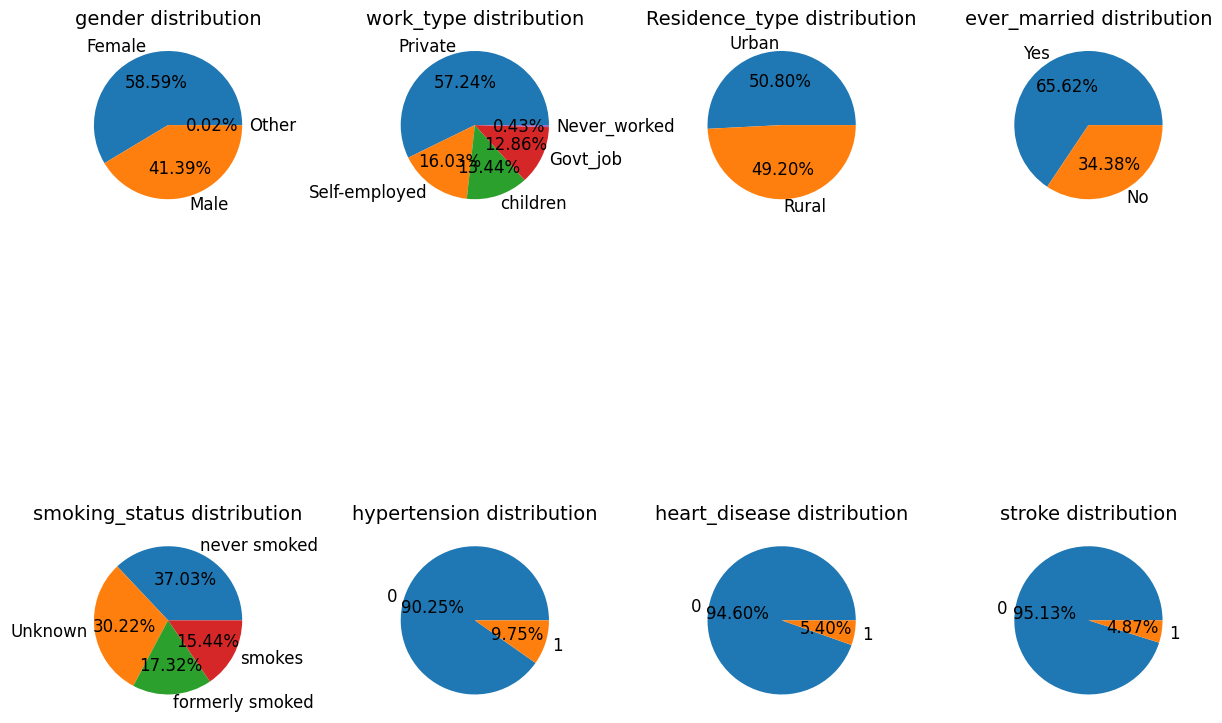


Grafikte kullanılan veriler:
gender: {'labels': ['Female', 'Male', 'Other'], 'sizes': [2994, 2115, 1]}
work_type: {'labels': ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], 'sizes': [2925, 819, 687, 657, 22]}
Residence_type: {'labels': ['Urban', 'Rural'], 'sizes': [2596, 2514]}
ever_married: {'labels': ['Yes', 'No'], 'sizes': [3353, 1757]}
smoking_status: {'labels': ['never smoked', 'Unknown', 'formerly smoked', 'smokes'], 'sizes': [1892, 1544, 885, 789]}
hypertension: {'labels': [0, 1], 'sizes': [4612, 498]}
heart_disease: {'labels': [0, 1], 'sizes': [4834, 276]}
stroke: {'labels': [0, 1], 'sizes': [4861, 249]}


In [6]:
# Dinamik olarak value_counts işlemi yapıyoruz
columns_to_analyze = ["gender", "work_type", "Residence_type", "ever_married", "smoking_status", "hypertension", "heart_disease", "stroke"]

def generate_pie_charts(data):
    # Sonuçları bir sözlük içinde topluyoruz
    value_counts_dict = {}
    for column in columns_to_analyze:
        value_counts_dict[column] = data[column].value_counts().to_dict()

    # Sonuçları yazdırıyoruz
    for column, counts in value_counts_dict.items():
        print(f"{column}: {counts}")

    # Pasta grafikleri ve grafikte kullanılan veriler için bir sözlük
    graph_data_dict = {}

    # Pasta grafikleri için ayar
    num_columns = len(columns_to_analyze)
    fig, axes = plt.subplots(2, (num_columns + 1) // 2, figsize=(12, 12))  # Figsize büyütüldü

    # Her sütun için pasta grafiği oluşturma
    for idx, column in enumerate(columns_to_analyze):
        if column in value_counts_dict:
            column_data = value_counts_dict[column]
            labels = list(column_data.keys())
            sizes = list(column_data.values())
            
            # Grafikte kullanılan verileri kaydet
            graph_data_dict[column] = {"labels": labels, "sizes": sizes}
            
            # Çoklu eksen durumu için kontrol
            row, col = divmod(idx, (num_columns + 1) // 2)
            ax = axes[row, col]
            textprops = {"fontsize": 12}  # Yazı boyutu artırıldı
            ax.pie(sizes, labels=labels, autopct='%1.2f%%', textprops=textprops)
            ax.set_title(f'{column} distribution', fontsize=14)  # Başlık boyutu artırıldı

    # Boş kalan alanları kaldırma
    for i in range(idx + 1, axes.size):
        fig.delaxes(axes.flatten()[i])

    # Grafik aralarını düzenleme
    plt.tight_layout()
    plt.show()

    return graph_data_dict

# Sözlüğü oluşturma
graph_data = generate_pie_charts(data)

# Daha sonra kullanma
print("\nGrafikte kullanılan veriler:")
for column, graph_data_item in graph_data.items():
    print(f"{column}: {graph_data_item}")


### KATEGORİK VERİLERİN NÜMERİK HALE GETİRİLMESİ

In [7]:
kategorik_ozellikler = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
sayısal_ozellikler = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']


# her özelliğin içeriğinde benzersiz değişkenler yazılır
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever"_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

work_type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender :  ['Male' 'Female' 'Other']
Residence_type :  ['Urban' 'Rural']
ever"_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
le=LabelEncoder() # kategorik veriler sayısal verilere dönüştürülür
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [9]:
# oluşturulan sayısal veriler kategorik ile yer değiştirilir
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [10]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


### NORMALİZASYON VE STANDARDİZASYON İŞLEMLERİ

In [10]:

# Normalizasyon ve standardizasyon için scaler'lar
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Standardizasyon gerektiren sütunlar
columns_to_standardize = ['age', 'bmi', 'avg_glucose_level']
for col in columns_to_standardize:
    data[col] = standard_scaler.fit_transform(data[[col]])


# Normalizasyon gerektiren sütunlar
columns_to_normalize = ['avg_glucose_level'] 
for col in columns_to_normalize:
    data[col] = minmax_scaler.fit_transform(data[[col]])


In [11]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,0.801265,1.001234e+00,1,1
1,0,0.786070,0,0,1,3,0,0.679023,4.615554e-16,2,1
2,1,1.626390,0,1,1,2,0,0.234512,4.685773e-01,2,1
3,0,0.255342,0,0,1,2,1,0.536008,7.154182e-01,3,1
4,0,1.582163,1,0,1,3,0,0.549349,-6.357112e-01,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.626390,1,0,1,2,1,0.132167,4.615554e-16,2,0
5106,0,1.670617,0,0,1,3,1,0.323516,1.442949e+00,2,0
5107,0,-0.363842,0,0,1,3,0,0.128658,2.217363e-01,2,0
5108,1,0.343796,0,0,1,2,0,0.513203,-4.278451e-01,1,0


### ÖNEMLİ ÖZELLİKLERİN BELİRLENMESİ

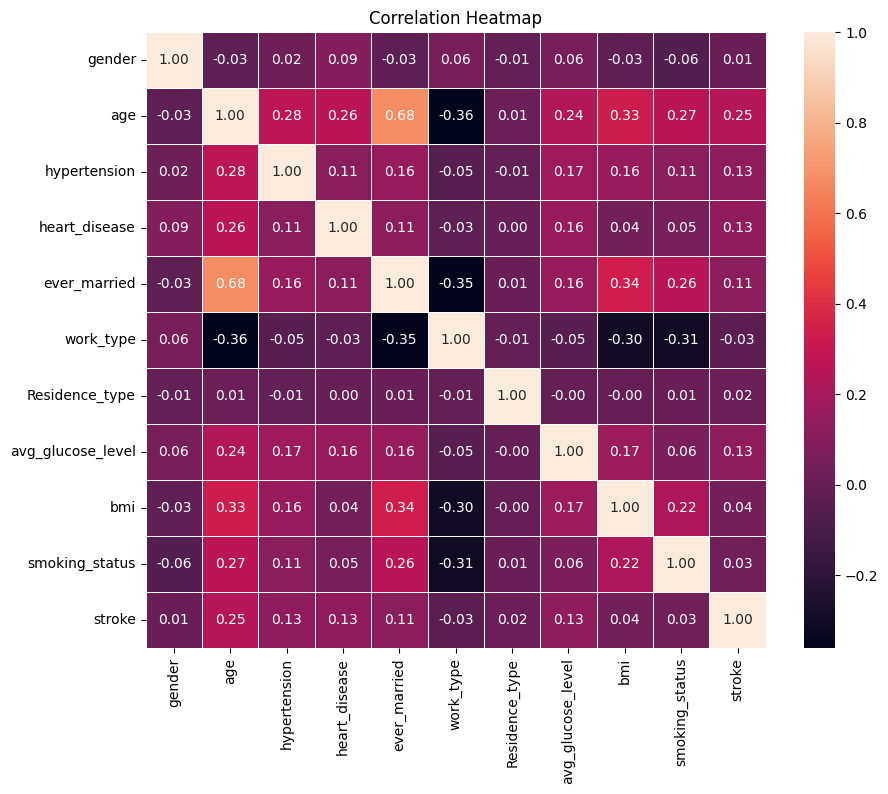

In [12]:
# önemli özellikleri çıkarmak için korelasyon matrisi hesaplanır

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
#FEATURE SELECTİON
# RFE için veri ayarlama 
X = data.drop(columns=['stroke'])  # Bağımsız değişkenler
y = data['stroke']  # Bağımlı değişken



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#RFE için eğitim ve test veri setine ayrıldı 


# Eksik değerleri kontrol etme
print(data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Selected features: Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


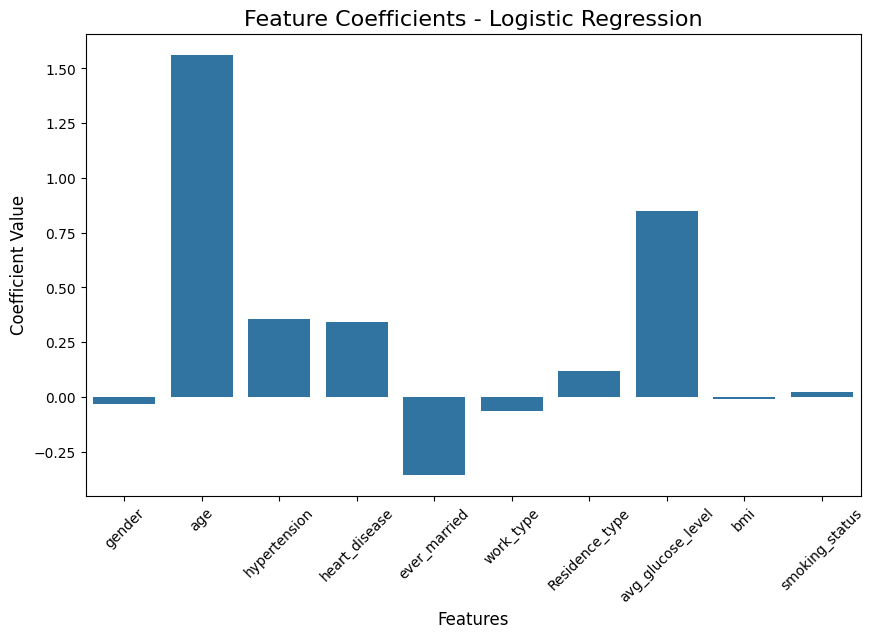

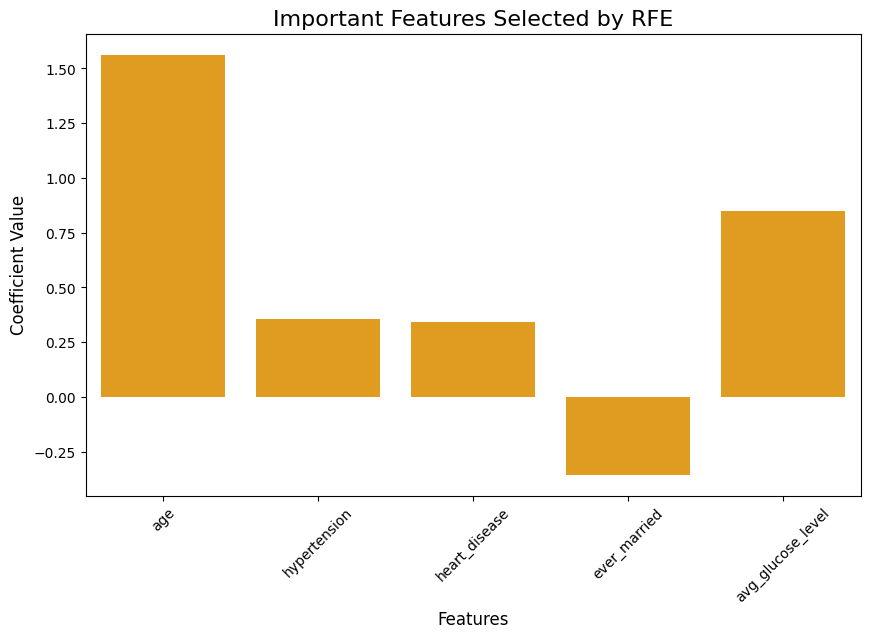

In [15]:
model = LogisticRegression()
from sklearn.feature_selection import RFE
# RFE modelini tanımla, 5 en iyi özelliği seç
rfe = RFE(model, n_features_to_select=5)

# RFE'yi eğitim verisi üzerinde eğit
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Seçilen özellikleri yazdır
selected_features = X_train.columns[rfe.get_support()]
print("Selected features:", selected_features)

# Katsayıları al
model.fit(X_train, y_train)
coef = model.coef_[0]

# Özelliklerin katsayılarını görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coef)
plt.title('Feature Coefficients - Logistic Regression', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Önemli özellikleri vurgulayan bar grafiği
important_features = [X.columns[i] for i in range(len(X.columns)) if rfe.support_[i]]
important_coef = [coef[i] for i in range(len(coef)) if rfe.support_[i]]

plt.figure(figsize=(10, 6))
sns.barplot(x=important_features, y=important_coef, color='orange')
plt.title('Important Features Selected by RFE', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### SINIF DAĞILIMI

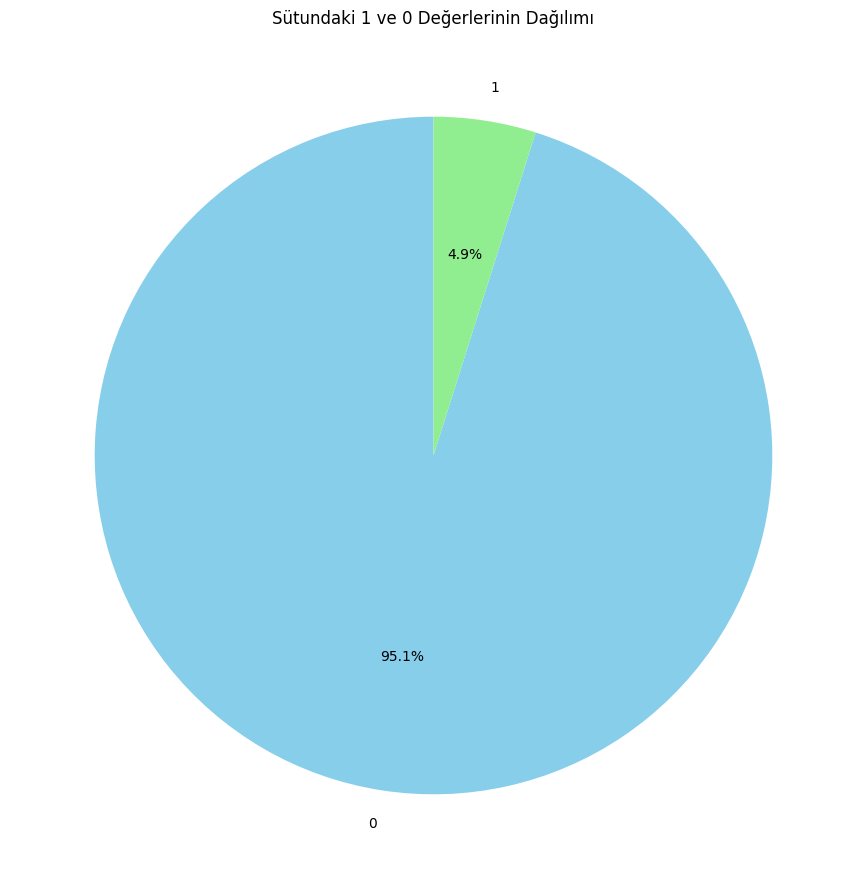

In [16]:
# 1 ve 0 değerlerinin sayısını hesapla
value_counts = data['stroke'].value_counts()

# Pie chart oluştur
value_counts.plot.pie(autopct='%1.1f%%', labels=['0', '1'], colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Y ekseni etiketini gizler
plt.title('Sütundaki 1 ve 0 Değerlerinin Dağılımı')
plt.show()


In [17]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)


### SMOTE YÖNTEMİ İLE DENGESİZLİĞİN ÇÖZÜMÜ

In [18]:
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [19]:
Y.value_counts()

stroke
0         4861
1          249
Name: count, dtype: int64

In [20]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

stroke
0         4861
1         4861
Name: count, dtype: int64

### VERİ SETİNİN AYRILMASI

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)

In [22]:
Y_train.value_counts()

stroke
0         3892
1         3885
Name: count, dtype: int64

## MAKİNE ÖĞRENMESİ MODEL EĞİTİMLERİ

### SVM


In [23]:
# Hiperparametre aralıkları
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

print("\U0001F31F SVM hiperparametre optimizasyonu başlıyor! Lütfen bekleyiniz...")

# Simüle edilmiş bir yükleme animasyonu
for _ in range(3):
    print("\u23F3 Model aranıyor", end="", flush=True)
    for _ in range(3):
        time.sleep(0.5)
        print(".", end="", flush=True)
    print()

# GridSearchCV ile en iyi modelin aranması
grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True),
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

print("\U0001F680 Model eğitimi başladı!")
grid_search_svm.fit(X_train, Y_train)

# En iyi model ve parametreler
best_svm_model = grid_search_svm.best_estimator_
print("\n\u2705 En iyi model başarıyla bulundu!")
print("\U0001F50D En İyi Parametreler:", grid_search_svm.best_params_)
print("\U0001F4C8 Çapraz doğrulama ile en iyi doğruluk oranı:", round(grid_search_svm.best_score_ * 100, 2), "%")

# Test seti üzerinde doğruluk
print("\n\U0001F9EA Test setinde model değerlendirmesi yapılıyor...")
Y_pred_SVM = best_svm_model.predict(X_test)
SVM_Accuracy = accuracy_score(Y_test, Y_pred_SVM)
print("\U0001F3AF Test Seti Doğruluk Oranı:", round(SVM_Accuracy * 100, 2), "%")

# Confusion Matrix Hesaplama
CM = confusion_matrix(Y_test, Y_pred_SVM)
print("\n\U0001F4CA Confusion Matrix:")
print(CM)

# Model değişkene atanır
print("\n\U0001F4E5 En iyi model bir değişkene atanıyor...")
en_iyi_svm_model = best_svm_model
print("\U0001F389 En iyi model başarıyla değişkene atandı!")


🌟 SVM hiperparametre optimizasyonu başlıyor! Lütfen bekleyiniz...
⏳ Model aranıyor...
⏳ Model aranıyor...
⏳ Model aranıyor...
🚀 Model eğitimi başladı!
Fitting 5 folds for each of 32 candidates, totalling 160 fits

✅ En iyi model başarıyla bulundu!
🔍 En İyi Parametreler: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
📈 Çapraz doğrulama ile en iyi doğruluk oranı: 87.05 %

🧪 Test setinde model değerlendirmesi yapılıyor...
🎯 Test Seti Doğruluk Oranı: 87.66 %

📊 Confusion Matrix:
[[780 189]
 [ 51 925]]

📥 En iyi model bir değişkene atanıyor...
🎉 En iyi model başarıyla değişkene atandı!


 ### Decision Tree classifier

In [24]:
# Özel scoring fonksiyonu (negatif log-loss için)
def negative_log_loss(y_true, y_pred_prob):
    """Negatif log-loss'u hesaplar."""
    return -log_loss(y_true, y_pred_prob)

# Custom scorer
custom_scorer = make_scorer(negative_log_loss, greater_is_better=False, needs_proba=True)

# Hiperparametre aralıkları
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Giriş
print("\U0001F31F Karar ağacı hiperparametre optimizasyonu başlıyor!")

# Simüle edilmiş bir yükleme animasyonu (opsiyonel)
for _ in range(2):
    print("\u23F3 Model aranıyor", end="", flush=True)
    for _ in range(3):
        time.sleep(0.5)
        print(".", end="", flush=True)
    print()

# GridSearchCV ile en iyi modelin aranması
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring=custom_scorer,  # Negatif log-loss'u optimize ediyoruz
    cv=5,                   # 5 katlı çapraz doğrulama
    verbose=2,              # Detaylı çıktı
    n_jobs=-1               # Tüm çekirdekleri kullan
)

print("\U0001F680 Model eğitimi başladı!")
grid_search.fit(X_train, Y_train)

# En iyi model ve parametreler
best_model = grid_search.best_estimator_
print("\n\u2705 En iyi model başarıyla bulundu!")
print("\U0001F50D En İyi Parametreler:", grid_search.best_params_)
print("\U0001F4C8 Çapraz doğrulama ile en iyi negatif log-loss skoru:", round(grid_search.best_score_, 4))

# Test seti üzerinde doğruluk
print("\n\U0001F9EA Test setinde model değerlendirmesi yapılıyor...")
Y_pred_DTC = best_model.predict(X_test)
Y_pred_proba_DTC = best_model.predict_proba(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
DTC_LogLoss = log_loss(Y_test, Y_pred_proba_DTC)
print("\U0001F3AF Test Seti Doğruluk Oranı:", round(DTC_Accuracy * 100, 2), "%")
print("\U0001F4DD Test Seti Log-Loss Değeri:", round(DTC_LogLoss, 4))

# Özellik önemleri
if hasattr(best_model, 'feature_importances_'):
    print("\n\U0001F50D Özellik önemleri analiz ediliyor...")
    time.sleep(1)
    print("\U0001F4CA Özelliklerin Önem Dereceleri:", best_model.feature_importances_)
else:
    print("\U0001F6AB Özellik önemleri mevcut değil (model yapısı desteklemiyor).")

# Model değişkene atanır
print("\n\U0001F4E5 En iyi model bir değişkene atanıyor...")
best_DCT_model = best_model
print("\U0001F389 En iyi model başarıyla değişkene atandı!")


🌟 Karar ağacı hiperparametre optimizasyonu başlıyor!
⏳ Model aranıyor...
⏳ Model aranıyor...
🚀 Model eğitimi başladı!
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

✅ En iyi model başarıyla bulundu!
🔍 En İyi Parametreler: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
📈 Çapraz doğrulama ile en iyi negatif log-loss skoru: nan

🧪 Test setinde model değerlendirmesi yapılıyor...
🎯 Test Seti Doğruluk Oranı: 82.16 %
📝 Test Seti Log-Loss Değeri: 0.4301

🔍 Özellik önemleri analiz ediliyor...
📊 Özelliklerin Önem Dereceleri: [1.62425565e-02 8.68925753e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.30132371e-03 1.92640215e-03 5.25344730e-02
 5.63527936e-02 7.16698417e-04]

📥 En iyi model bir değişkene atanıyor...
🎉 En iyi model başarıyla değişkene atandı!


### KNN

In [25]:
# Özel scoring fonksiyonu (negatif log-loss için)
def negative_log_loss(y_true, y_pred_prob):
    """Negatif log-loss'u hesaplar."""
    return -log_loss(y_true, y_pred_prob)

# Custom scorer
custom_scorer_knn = make_scorer(negative_log_loss, greater_is_better=False, needs_proba=True)

# Hiperparametre aralıkları
param_grid_knn = {
    'n_neighbors': [80],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

print("\U0001F31F KNN hiperparametre optimizasyonu başlıyor! Lütfen bekleyiniz...")

# Simüle edilmiş bir yükleme animasyonu
for _ in range(3):
    print("\u23F3 Model aranıyor", end="", flush=True)
    for _ in range(3):
        time.sleep(0.5)
        print(".", end="", flush=True)
    print()

# GridSearchCV ile en iyi modelin aranması
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring=custom_scorer_knn,  # Negatif log-loss'u optimize ediyoruz
    cv=5,
    verbose=1,
    n_jobs=-1
)

print("\U0001F680 Model eğitimi başladı!")
grid_search_knn.fit(X_train, Y_train)

# En iyi model ve parametreler
best_knn_model = grid_search_knn.best_estimator_
print("\n\u2705 En iyi model başarıyla bulundu!")
print("\U0001F50D En İyi Parametreler:", grid_search_knn.best_params_)
print("\U0001F4C8 Çapraz doğrulama ile en iyi negatif log-loss skoru:", round(grid_search_knn.best_score_, 4))

# Test seti üzerinde değerlendirme
print("\n\U0001F9EA Test setinde model değerlendirmesi yapılıyor...")
Y_pred_KNN = best_knn_model.predict(X_test)
Y_pred_proba_KNN = best_knn_model.predict_proba(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_pred_KNN)
KNN_LogLoss = log_loss(Y_test, Y_pred_proba_KNN)
print("\U0001F3AF Test Seti Doğruluk Oranı:", round(KNN_Accuracy * 100, 2), "%")
print("\U0001F4DD Test Seti Log-Loss Değeri:", round(KNN_LogLoss, 4))

# Model değişkene atanır
print("\n\U0001F4E5 En iyi model bir değişkene atanıyor...")
best_knn_model = best_knn_model
print("\U0001F389 En iyi model başarıyla değişkene atandı!")


🌟 KNN hiperparametre optimizasyonu başlıyor! Lütfen bekleyiniz...
⏳ Model aranıyor...
⏳ Model aranıyor...
⏳ Model aranıyor...
🚀 Model eğitimi başladı!
Fitting 5 folds for each of 6 candidates, totalling 30 fits

✅ En iyi model başarıyla bulundu!
🔍 En İyi Parametreler: {'metric': 'euclidean', 'n_neighbors': 80, 'weights': 'uniform'}
📈 Çapraz doğrulama ile en iyi negatif log-loss skoru: nan

🧪 Test setinde model değerlendirmesi yapılıyor...
🎯 Test Seti Doğruluk Oranı: 80.72 %
📝 Test Seti Log-Loss Değeri: 0.4168

📥 En iyi model bir değişkene atanıyor...
🎉 En iyi model başarıyla değişkene atandı!


### Logistic Regression

In [26]:
# Hiperparametre aralıkları
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

print("\U0001F31F Logistic Regression hiperparametre optimizasyonu başlıyor! Lütfen bekleyiniz...")

# Simüle edilmiş bir yükleme animasyonu
for _ in range(3):
    print("\u23F3 Model aranıyor", end="", flush=True)
    for _ in range(3):
        time.sleep(0.5)
        print(".", end="", flush=True)
    print()

# GridSearchCV ile en iyi modelin aranması
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

print("\U0001F680 Model eğitimi başladı!")
grid_search_lr.fit(X_train, Y_train)

# En iyi model ve parametreler
best_lr_model = grid_search_lr.best_estimator_
print("\n\u2705 En iyi model başarıyla bulundu!")
print("\U0001F50D En İyi Parametreler:", grid_search_lr.best_params_)
print("\U0001F4C8 Çapraz doğrulama ile en iyi doğruluk oranı:", round(grid_search_lr.best_score_ * 100, 2), "%")

# Test seti üzerinde doğruluka
print("\n\U0001F9EA Test setinde model değerlendirmesi yapılıyor...")
Y_pred_LR = best_lr_model.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_pred_LR)
print("\U0001F3AF Test Seti Doğruluk Oranı:", round(LR_Accuracy * 100, 2), "%")

# Confusion Matrix Hesaplama
CM = confusion_matrix(Y_test, Y_pred_LR)
print("\n\U0001F4CA Confusion Matrix:")
print(CM)

# Model değişkene atanır
print("\n\U0001F4E5 En iyi model bir değişkene atanıyor...")
best_lr_model = best_lr_model
print("\U0001F389 En iyi model başarıyla değişkene atandı!")


🌟 Logistic Regression hiperparametre optimizasyonu başlıyor! Lütfen bekleyiniz...
⏳ Model aranıyor...
⏳ Model aranıyor...
⏳ Model aranıyor...
🚀 Model eğitimi başladı!
Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ En iyi model başarıyla bulundu!
🔍 En İyi Parametreler: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
📈 Çapraz doğrulama ile en iyi doğruluk oranı: 78.18 %

🧪 Test setinde model değerlendirmesi yapılıyor...
🎯 Test Seti Doğruluk Oranı: 77.84 %

📊 Confusion Matrix:
[[719 250]
 [181 795]]

📥 En iyi model bir değişkene atanıyor...
🎉 En iyi model başarıyla değişkene atandı!


### MODELLERİN KARŞILAŞTIRILMASI

                 Model  train_accuracy  val_accuracy  train_precision  \
0                  KNN        0.808152      0.807198         0.740309   
1                  SVM        0.892889      0.876607         0.842460   
2        Decision Tree        0.819725      0.821594         0.774486   
3  Logistic Regression        0.782307      0.778406         0.759962   

   val_precision  train_recall  val_recall  train_f1    val_f1  train_loss  \
0       0.744110      0.948777    0.938525  0.831679  0.830086    0.415419   
1       0.830341      0.966281    0.947746  0.900132  0.885167    0.263888   
2       0.785649      0.901673    0.886270  0.833254  0.832932    0.407225   
3       0.760766      0.824710    0.814549  0.791013  0.786739    0.463277   

   val_loss  
0  0.416823  
1  0.298553  
2  0.430099  
3  0.466376  


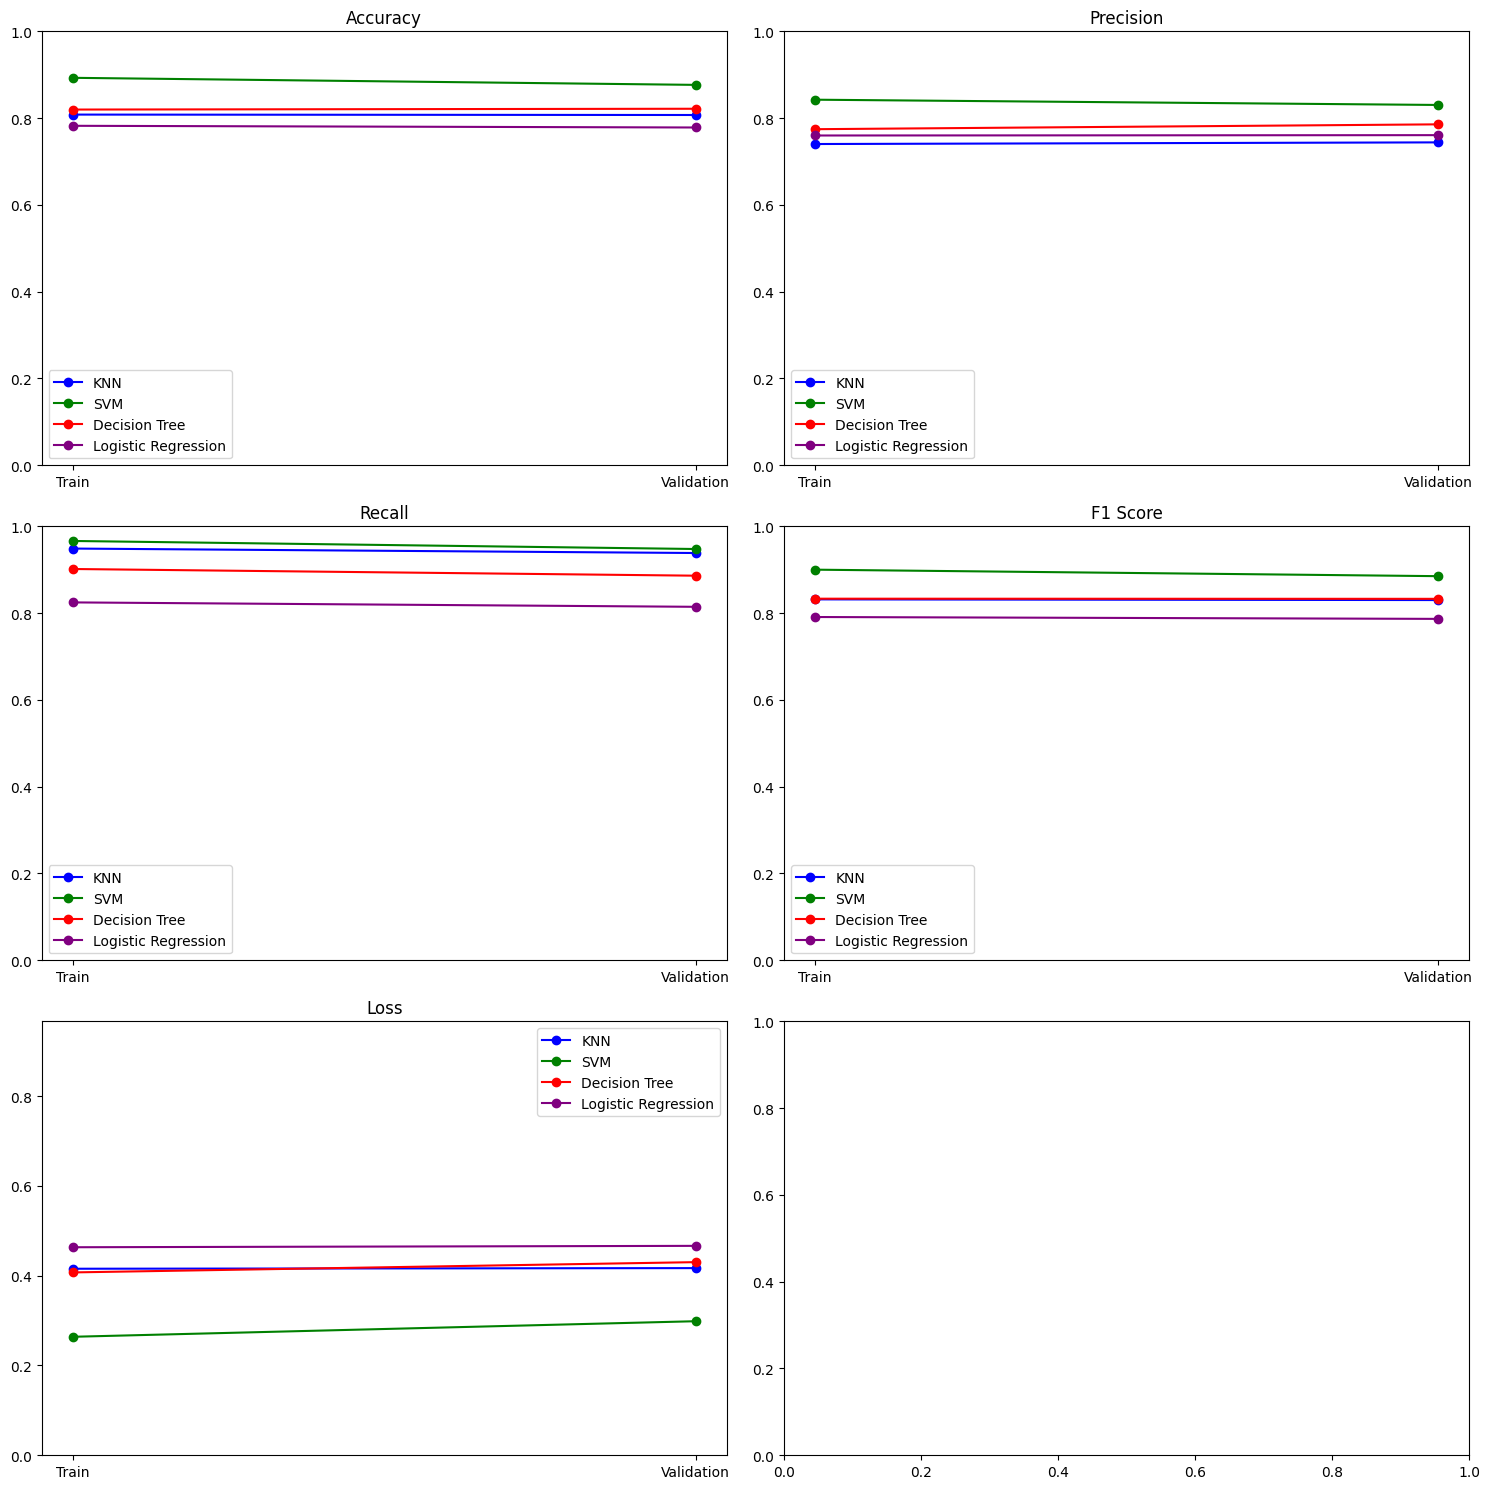

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Eğitim ve doğrulama setleri için metrikler
def compute_metrics(model, X_train, Y_train, X_val, Y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    metrics = {
        'train_accuracy': accuracy_score(Y_train, y_train_pred),
        'val_accuracy': accuracy_score(Y_val, y_val_pred),
        'train_precision': precision_score(Y_train, y_train_pred),
        'val_precision': precision_score(Y_val, y_val_pred),
        'train_recall': recall_score(Y_train, y_train_pred),
        'val_recall': recall_score(Y_val, y_val_pred),
        'train_f1': f1_score(Y_train, y_train_pred),
        'val_f1': f1_score(Y_val, y_val_pred),
        'train_loss': log_loss(Y_train, y_train_pred_proba),
        'val_loss': log_loss(Y_val, y_val_pred_proba)
    }
    return metrics

# Metrikleri hesapla her model için
models = [best_knn_model, best_svm_model, best_DCT_model, best_lr_model]
model_names = ['KNN', 'SVM', 'Decision Tree', 'Logistic Regression']
colors = ['blue', 'green', 'red', 'purple']
metrics_dict = {}

for model, name in zip(models, model_names):
    metrics_dict[name] = compute_metrics(model, X_train, Y_train, X_test, Y_test)

# Metrikleri DataFrame'e dönüştür
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})

# DataFrame'i yazdır
print(metrics_df)

# Tablodan kaydetmek isterseniz:
# metrics_df.to_csv("model_metrics.csv", index=False)

# Metrikleri görselleştirme
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Accuracy
for i, name in enumerate(model_names):
    axes[0, 0].plot(['Train', 'Validation'], [metrics_dict[name]['train_accuracy'], metrics_dict[name]['val_accuracy']], marker='o', label=name, color=colors[i])
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_title('Accuracy')
axes[0, 0].legend()

# Precision
for i, name in enumerate(model_names):
    axes[0, 1].plot(['Train', 'Validation'], [metrics_dict[name]['train_precision'], metrics_dict[name]['val_precision']], marker='o', label=name, color=colors[i])
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_title('Precision')
axes[0, 1].legend()

# Recall
for i, name in enumerate(model_names):
    axes[1, 0].plot(['Train', 'Validation'], [metrics_dict[name]['train_recall'], metrics_dict[name]['val_recall']], marker='o', label=name, color=colors[i])
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_title('Recall')
axes[1, 0].legend()

# F1 Score
for i, name in enumerate(model_names):
    axes[1, 1].plot(['Train', 'Validation'], [metrics_dict[name]['train_f1'], metrics_dict[name]['val_f1']], marker='o', label=name, color=colors[i])
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_title('F1 Score')
axes[1, 1].legend()

# Loss
for i, name in enumerate(model_names):
    axes[2, 0].plot(['Train', 'Validation'], [metrics_dict[name]['train_loss'], metrics_dict[name]['val_loss']], marker='o', label=name, color=colors[i])
axes[2, 0].set_ylim(0, max([metrics_dict[name]['train_loss'] for name in model_names] + [metrics_dict[name]['val_loss'] for name in model_names]) + 0.5)
axes[2, 0].set_title('Loss')
axes[2, 0].legend()

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Eğitim ve doğrulama setleri için metrikler
def compute_metrics(model, X_train, Y_train, X_val, Y_val):
    y_val_pred = model.predict(X_val)
    y_val_pred_proba = model.predict_proba(X_val)[:, 1]
    
    metrics = {
        'Accuracy': accuracy_score(Y_val, y_val_pred),
        'Precision': precision_score(Y_val, y_val_pred),
        'Recall': recall_score(Y_val, y_val_pred),
        'F1 Score': f1_score(Y_val, y_val_pred),
        'Log Loss': log_loss(Y_val, y_val_pred_proba)
    }
    return metrics

# Metrikleri hesapla her model için
models = [best_knn_model, best_svm_model, best_DCT_model, best_lr_model]
model_names = ['KNN', 'SVM', 'Decision Tree', 'Logistic Regression']
metrics_dict = {}

for model, name in zip(models, model_names):
    metrics_dict[name] = compute_metrics(model, X_train, Y_train, X_test, Y_test)

# Metrikleri DataFrame'e dönüştür
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})

# Sadece doğrulama metriklerini seç ve sayıları iki basamağa yuvarla
metrics_df.iloc[:, 1:] = metrics_df.iloc[:, 1:]

# Stil için yardımcı fonksiyonlar
def highlight_best(s):
    if s.name == 'Log Loss':  # Log Loss için en düşük değeri vurgula
        is_best = s == s.min()
    else:  # Diğer metrikler için en yüksek değeri vurgula
        is_best = s == s.max()
    return ['font-weight: bold; background-color: #0B3D91; color: white;' if v else '' for v in is_best]

styled_df = metrics_df.style.apply(highlight_best, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss'], axis=0)

# Stil detayları (daha koyu ve dikkat çekici renkler)
styled_df = styled_df.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#002171'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#1E88E5'), ('color', 'white')]},
    {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#1976D2'), ('color', 'white')]}
])

styled_df.set_caption("Validation Metrics Comparison")


,Model,Accuracy,Precision,Recall,F1 Score,Log Loss
0,KNN,0.807198,0.744110,0.938525,0.830086,0.416823
1,SVM,0.876607,0.830341,0.947746,0.885167,0.298835
2,Decision Tree,0.821594,0.785649,0.886270,0.832932,0.430099
3,Logistic Regression,0.778406,0.760766,0.814549,0.786739,0.466376
